# PYTHON-13. Визуализация данных. Итоговое задание

In [19]:
# Для начала, скачаем Zip-файл с учебным датасетом с обучающей платформы SkillFactory
import urllib.request
destination = 'churn.zip'
url = 'https://lms.skillfactory.ru/assets/courseware/v1/c903ecd0b0c995c44213d620ab6ae94d/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/churn.zip'
urllib.request.urlretrieve(url, destination);

In [20]:
# Распакуем churn.csv из скаченного Zip-файла
from zipfile import ZipFile
with ZipFile(destination, "r") as myzip:
    myzip.extractall()

In [21]:
# Импортируем все используемые библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'

plotly.__version__
%matplotlib inline
# Окрываем датасет
churn_data = pd.read_csv('churn.csv')

In [22]:
# Удаляем дублирующий признак
churn_data = churn_data.drop('RowNumber',axis=1)
# Создаем категориальный признак ExitedCat на основе существующего Exited (оставляем его для фильрации)
churn_data['ExitedCat'] = churn_data['Exited']
churn_data['ExitedCat'] = churn_data['ExitedCat'].astype('category')
churn_data['ExitedCat'] = churn_data['ExitedCat'].cat.rename_categories({
    0: 'Лояльный клиент',
    1: 'Ушедший клиент'
}).astype('category')


## Задание 1. Соотношение ушедших и лояльных клиентов

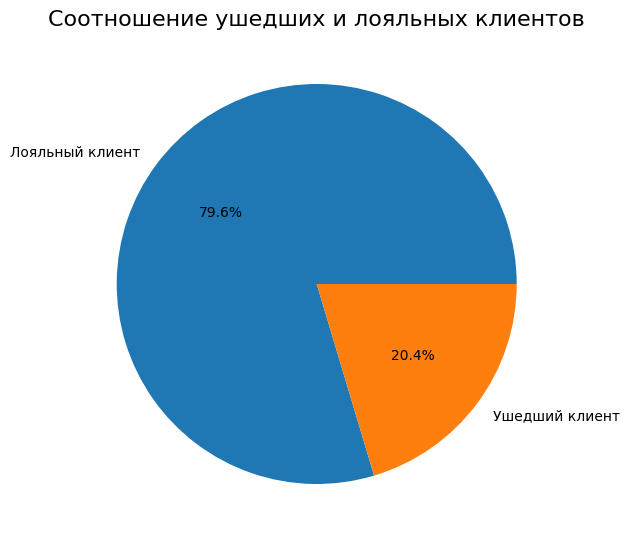

In [23]:
# Формируем отдельный датасет для круговой диаграммы
Exited_combinations = churn_data['ExitedCat'].value_counts().sort_index()
# Формируем канвас 
fig = plt.figure(figsize=(5, 5))
# Формируем оси координат
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Соотношение ушедших и лояльных клиентов', fontsize=16)
# Формируем круговую диаграмму
axes.pie(
    Exited_combinations,
    labels=Exited_combinations.index,
    autopct='%.1f%%' 
);


Отношение количества клиентов банка, которые постоянно пользуются его услугами, к общему количеству клиентов банка составляет примерно 80%. Это показывает, что банк очень хорошо выстраивает долгосрочные отношения с клиентами. Однако, 20% — отток клиентов. Из банка ушел каждый пятый клиент. Это сигнал, что  нужно разобраться в причинах и устранить их. 

## Задание 2. Распределение баланса пользователей, у которых на счету больше 2 500 долларов

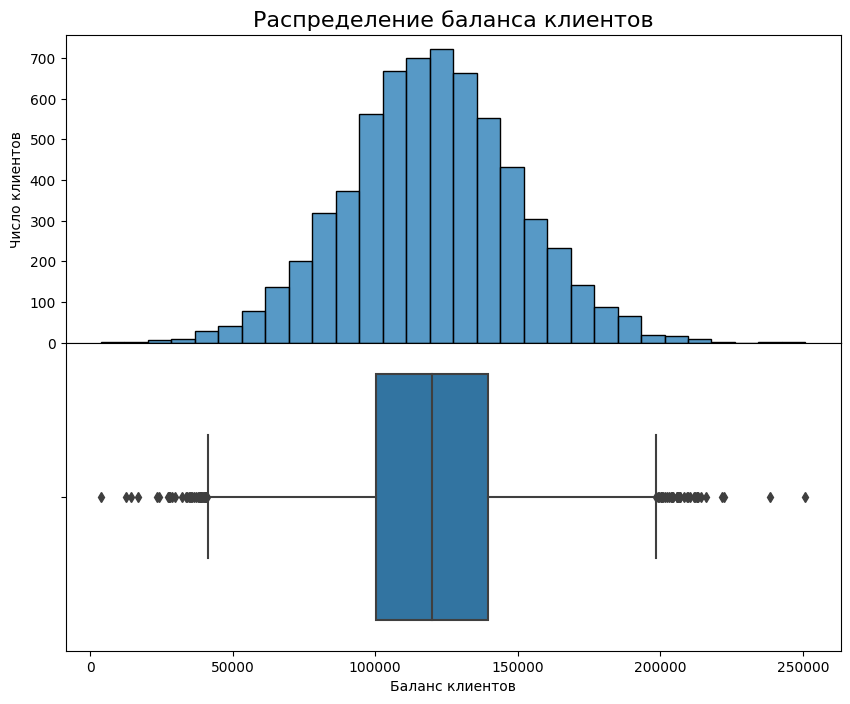

In [24]:
# Формируем отдельный датасет для гистограммы
balance_distribution = churn_data[churn_data['Balance'] > 2500]
# Формируем канвас из двух вертикальных ячеек
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
plt.subplots_adjust(hspace=.0)
# Формируем гистограмму в первой ячейке канваса
histplot1 = sns.histplot(
    data=balance_distribution, 
    x='Balance', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение баланса клиентов', fontsize=16)
histplot1.set_ylabel('Число клиентов')
# Формируем гистограмму в второй ячейке канваса
histplot2 = sns.boxplot(
    data=balance_distribution,
    x='Balance',
#    y='Exited',
    ax=axes[1]
)
histplot2.set_xlabel('Баланс клиентов');

Из клиентов банка, у которых на счету больше 2 500 долларов, распределение похоже на нормальное, половина имеют на своих счетах, примерно от 100 до 140 тыс.долларов, медианный баланс составляет примерно 120 тыс.долларов. Доверие банку столь значительных средств со стороны клиентов, говорит о его конкурентноспособности. 

## Задание 3. Распределение баланса клиента в разрезе признака оттока

In [25]:
# Формируем канвас из двух вертикальных ячеек
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
plt.subplots_adjust(hspace=.0)
# Формируем гистограмму в первой ячейке канваса
histplot1 = sns.histplot(
    data=churn_data, 
    x='Balance', 
    bins=30,
    ax=axes[0],
)
histplot1.set_title('Распределение баланса клиентов', fontsize=16)
histplot1.set_ylabel('Число клиентов')
# Формируем гистограмму в второй ячейке канваса
histplot2 = sns.boxplot(
    data=churn_data,
    x='Balance',
    y='ExitedCat',
    ax=axes[1]
)
histplot2.set_xlabel('Баланс клиентов');
histplot2.set_ylabel('');

Cуммы на накопительном счёте ушедших из банка клиентов и лояльных клиентов значительно различаются по первому квартилю, у лояльных клиентов 0, у оттока 38 тыс.долларов. Медианные балансы у лояльных клиентов тоже меньше, но не так значительно отличаются как первые квартили. У лояльных 92 тыс.долларов, у оттока 109 тыс.долларов. По третьему квартилю разница между лояльными клиентами и оттоком не столь значительна, 126 тыс. и 131 тыс. долларов соотвественно.  
Возможно одной и причин оттока клиетов является не столь выгодные условия хранения более крупных денежных средств клиентов, на накопительных счетах, в сравнении с банками конкурентами.

## Задание 4. Распределение возраста в разрезе признака оттока.

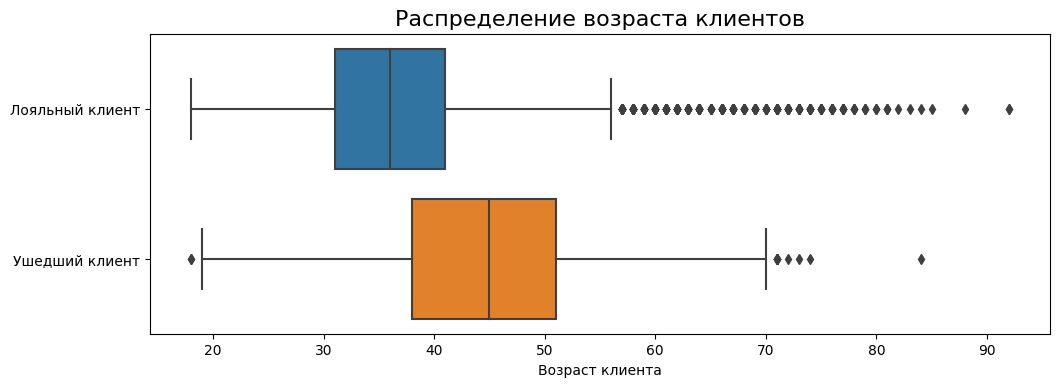

In [26]:
# Формируем канвас
fig = plt.figure(figsize=(9, 3))
axes = fig.add_axes([0, 0, 1, 1])
# Формируем коробчатую диаграмму 
histplot1 = sns.boxplot(
    data=churn_data, 
    x='Age',
    y='ExitedCat', 
#    color='green',
#    bins=30,
    ax=axes
)
histplot1.set_title('Распределение возраста клиентов', fontsize=16)
histplot1.set_xlabel('Возраст клиента')
histplot1.set_ylabel('');

Среди лояльных клиентов больше всего потенциальных выбросов.  
Половина оттока клиентов относится к возврастной категории от 38 до 51 года.

## Задание 5. Взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты, в разрезе признака оттока

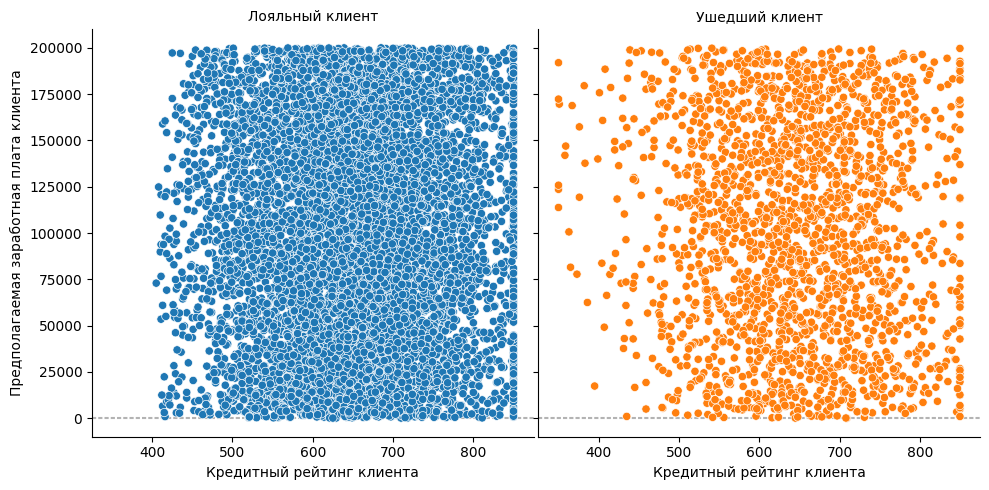

In [27]:
# Формируем диаграмму рассеяния
rp = sns.relplot(
    data=churn_data,
    x='CreditScore',
    y='EstimatedSalary',
    hue='ExitedCat',
    col='ExitedCat',
    legend=False
)
# Добавляем горизонтальную ячейку в канвас
(rp.map(plt.axhline, y=0, color=".7", dashes=(2, 1), zorder=0)
  .set_axis_labels("Кредитный рейтинг клиента", "Предполагаемая заработная плата клиента")
  .set_titles("{col_name}")
  .tight_layout(w_pad=0));

Основная масса клиентов имеет кредитный рейтинг от 500 до 800, который никак не зафисит от предполагаемой зарплаты. Здесь никаких взаимосвязей не выявлено. Единственное, что здесь можно добавить - только у ушедших клиентов есть рейтинг ниже 400. 

## Задание 6. Кто чаще уходит, мужчины или женщины?

In [28]:
# Преобразуем признак Gender в категориальный тип данных
churn_data['Gender'] = churn_data['Gender'].astype('category')
churn_data['Gender'] = churn_data['Gender'].cat.rename_categories({
    'Female': 'Женский пол',
    'Male': 'Mужской пол'
})

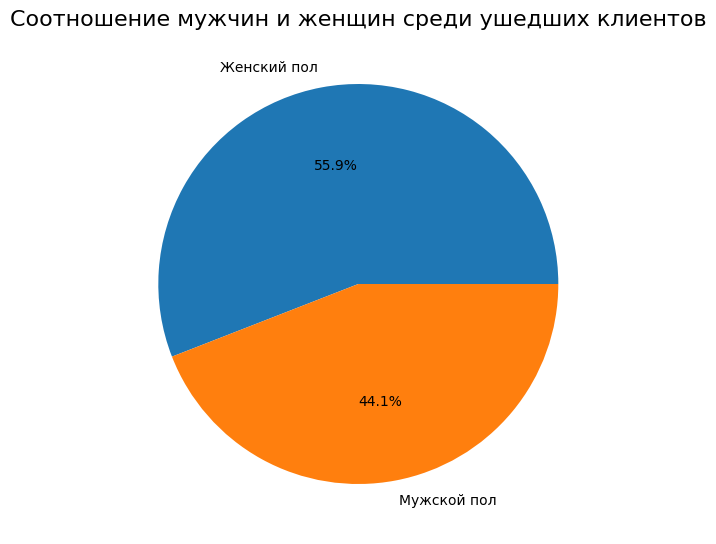

In [29]:
# Формируем отдельный датасет для круговой диаграммы
Gender_combinations = churn_data[churn_data['Exited'] == 1]['Gender'].value_counts().sort_index()
# Формируем канвас
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.set_title('Соотношение мужчин и женщин среди ушедших клиентов', fontsize=16)
axes.pie(
    Gender_combinations,
    labels=Gender_combinations.index,
    autopct='%.1f%%' 
);

Прорисовывается не значительная зависимость оттока клиентов по половому признаку, не большой перевес в сторону женщин.

## Задание 7. Зависимость оттока клиентов завис от числа приобретённых у банка услуг

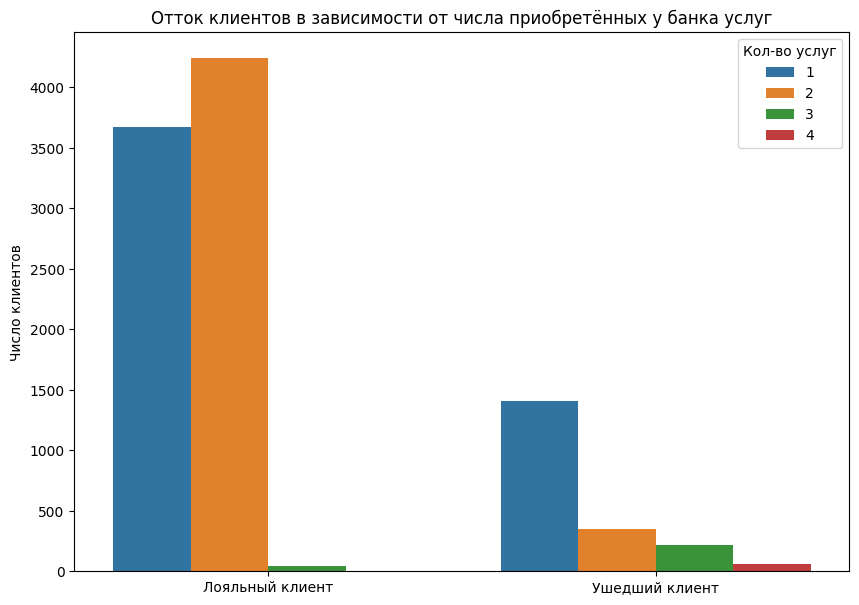

In [30]:
# Формируем отдельный датасет для столбчатой диаграммы
Exited_from_NumOfProducts = churn_data.groupby(['ExitedCat', 'NumOfProducts'],as_index=False)[['CustomerId']].count()
fig = plt.figure(figsize=(10, 7))
# Формируем канвас
barplot = sns.barplot(
    data=Exited_from_NumOfProducts,
    x='ExitedCat',
    y='CustomerId',
    hue='NumOfProducts',

)
plt.legend(title='Кол-во услуг')
barplot.set_title('Отток клиентов в зависимости от числа приобретённых у банка услуг')
#barplot.set_xlabel('Количество услуг банка, которые приобрёл клиент')
barplot.set_xlabel('')
barplot.set_ylabel('Число клиентов');


Выявлена прямая зависимость оттока клиентов от количества услуг банка, которые приобрёл клиент, т.е. чем больше количество услуг банка, которые приобрёл клиент, тем меньше шансов, что он уйдет. 

## Задание 8. Влияние наличия статуса активного клиента на отток клиентов

In [31]:
# Преобразуем признак IsActiveMember в категориальный тип данных
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].astype('category')
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].cat.rename_categories({
    1: 'Да',
    0: 'Нет'
})

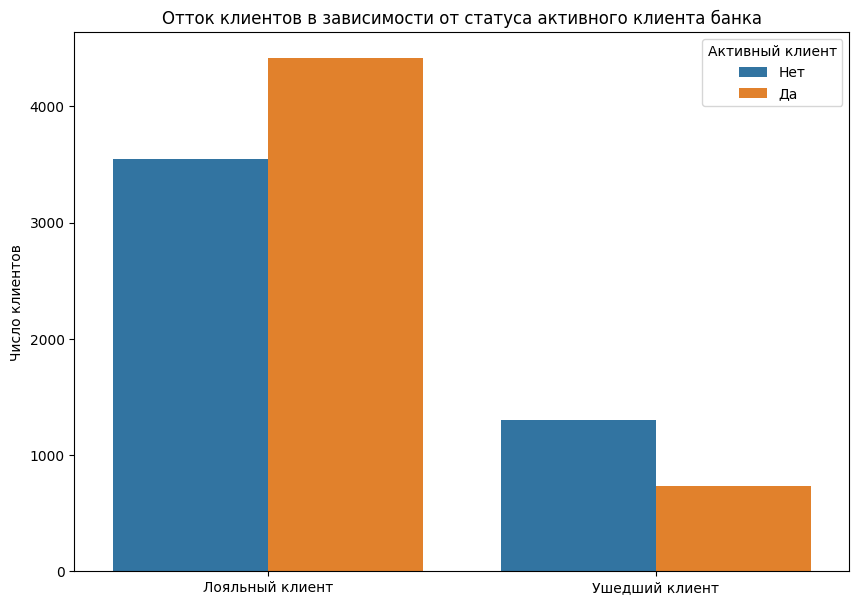

In [32]:
# Формируем отдельный датасет для столбчатой диаграммы
Exited_from_IsActiveMember = (churn_data.groupby(['ExitedCat', 'IsActiveMember'],
                    as_index=False)[['CustomerId']].count())
# Формируем канвас
fig = plt.figure(figsize=(10, 7))
# Формируем столбчатую диаграмму
barplot = sns.barplot(
    data=Exited_from_IsActiveMember,
    x='ExitedCat',
    y='CustomerId',
    hue='IsActiveMember',
    orient='v',
#    dodge=False
)
plt.legend(title='Активный клиент')
barplot.set_title('Отток клиентов в зависимости от статуса активного клиента банка')
barplot.set_xlabel('')
barplot.set_ylabel('Число клиентов');

Как видно из графика отток клиентов на прямую зависит от статуса активного клиента банка, не активные клиенты уходят чаще. И это логично. Так же исходя из предыдущего графика, видно что отток уменьшается при увеличении количества услуг банка, которые приобрёл клиент. Т.е. я бы предложил банку прелагать неактивным клиентам как можно больше дополнительных и сопуствующих услуг.

## Задание 9. Доля ушедших клиентов по странам

In [33]:
# Формируем датасет для картограммы, сгрупперованный по признаку Geography, 
# агрегатным зачением выбрано среднне по признаку Exited (доля ушедших из банка клиентов)
Exited_in_Countries = (churn_data.groupby('Geography',
                    as_index=False)[['Exited']].mean())
Exited_in_Countries['Exited'] = (Exited_in_Countries['Exited'] * 100).round(2)
# Переименуем имя столбца для отображения в картограмме
Exited_in_Countries.columns = Exited_in_Countries.columns.str.replace('Exited', 'Доля')
#строим картограмму
fig = px.choropleth(
    data_frame=Exited_in_Countries, # датафрейм
    locations="Geography", # столбец с локациями
    locationmode = "country names", # режим сопоставления локаций с базой plotly
    color="Доля", # от чего зависит цвет
    range_color=[0, Exited_in_Countries['Доля'].max()], 
    title='Геолокация клиентов ушедших из банка', #заголовок
    width=800, # ширина
    height=600, # высота
    color_continuous_scale='Reds', # палитра цветов,
    projection='natural earth', # проекция изображения
    scope='europe' # часть света
    )
#отображаем его
fig.show()

Максимальную долю ушедших из банка клиентов имеет Германия, примерно 32%.

## Задание 10. Отток клиентов банка в зависимости от кредитного рейтинга и длительности пользования услуг банка

In [34]:
def get_credit_score_cat(credit_score):
    """Функция преобразования кредитного рейтинга 
        из числового выражения в категориальное.

    Args:
        credit_score (числовой тип): на входе кредитный рейтинг ввиде числовго выражения

    Returns:
        категориальный тип: на выходе кредитный рейтинг ввиде категориального выражения
    """
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
churn_data['CreditScoreCat'] = churn_data['CreditScoreCat'].astype('category')

In [35]:
# Создаем сводную таблицу средних значений Exited (доля ушедших из банка клиентов)
# по категориям кредитного рейтинга и длительности пользования услуг банка
pivot1 = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
)
pivot1.columns = pivot1.columns.astype('string')

# Создаем такуюже таблицу, но только с положительным балансом
pivot2 = churn_data[churn_data['Balance'] > 0].pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
)
pivot2.columns = pivot2.columns.astype('string')

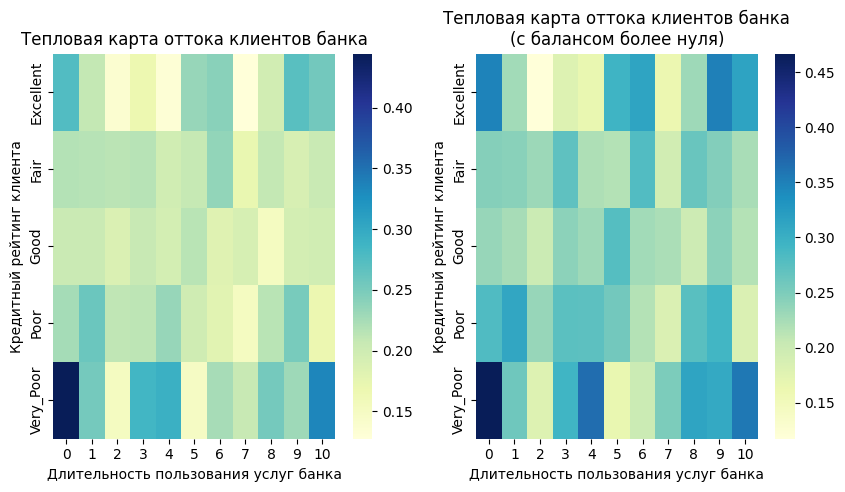

In [36]:
# Формируем канвас из двух ячеек для отображения двух тепловых карт
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
plt.subplots_adjust(hspace=.0)

# Формируем тепловые карты
heatmap1 = sns.heatmap(data=pivot1, cmap='YlGnBu', ax=axes[0])
heatmap1.set_title('Тепловая карта оттока клиентов банка')
heatmap1.set_xlabel('Длительность пользования услуг банка')
heatmap1.set_ylabel('Кредитный рейтинг клиента');

heatmap2 = sns.heatmap(data=pivot2, cmap='YlGnBu', ax=axes[1])
heatmap2.set_title('Тепловая карта оттока клиентов банка\n(c балансом более нуля)')
heatmap2.set_xlabel('Длительность пользования услуг банка')
heatmap2.set_ylabel('Кредитный рейтинг клиента');



По первой тепловой карте, как и по второй, не выявляется каких либо тенденций. Существенной разницы между двумя тепловыми картами не выявляется, единственное, что можно сказать второй вариант наиболее выражен. 
Вторая теплограмма приведена на случай, если будет интересно посмотреть на ту же таблицу корреляции, но без клиентов с нулевым балансом. 
И так видно в обоих тепловых картах, что наибольшую долю клиентов ушедших из банка имеют клиенты с кредитным рейтингом Very_Poor, со сроком использования услуг банка менее 1 года. Следующая по значимости доля клиентов в этой же категории, но с длительностью использования услуг банка более 10 лет, следом идет длительность 3-4 года все в той же категории.
